In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book (1).csv


In [ ]:
df = pd.read_csv('book (1).csv')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [ ]:
df.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [ ]:
df.shape

(10000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [ ]:
#drop the column Unnamed as it is of no use
book_df = df.drop('Unnamed: 0', axis=1)
book_df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [ ]:
len(book_df['User.ID'].unique())

2182

In [ ]:
len(book_df['Book.Title'].unique())

9659

In [ ]:
#change names of columns to shorter names
book_df = book_df.rename({'User.ID':'UserID', 'Book.Title':'Book', 'Book.Rating':'Rating'}, axis = 1)
book_df.columns

Index(['UserID', 'Book', 'Rating'], dtype='object')

In [ ]:
#check for missing values
book_df.isna().sum()

UserID    0
Book      0
Rating    0
dtype: int64

In [ ]:
#check for duplicate values
book_df[book_df.duplicated()]

,UserID,Book,Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


We will treat duplicate values after converting data to wide format.

In [ ]:
#check data types of columns
book_df.dtypes

UserID     int64
Book      object
Rating     int64
dtype: object

In [ ]:
#Highest and lowest rating given to any movie
book_df.Rating.unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


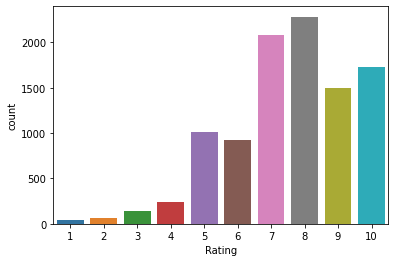

In [ ]:
sns.countplot(book_df.Rating)

we can see '8' is the rating given to the majority of times and '1' is the rating given very less times.

In [ ]:
#Most & least rated books
most_rated_a = book_df.Book.value_counts().head()
most_rated_a

Fahrenheit 451                                   5
Charlie and the Chocolate Factory                4
The Subtle Knife (His Dark Materials, Book 2)    4
Vanished                                         4
Ender's Game (Ender Wiggins Saga (Paperback))    4
Name: Book, dtype: int64

In [ ]:
least_rated_a = book_df.Book.value_counts().tail()
least_rated_a

Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book, dtype: int64

In [ ]:
array = ([['Fahrenheit 451',5], ['Charlie and the Chocolate Factory',4],['The Subtle Knife (His Dark Materials, Book 2)',4],
         ['Vanished',4],['Enders Game (Ender Wiggins Saga (Paperback))',4],['Murder on St. Marks Place (Gaslight Mysteries)',1],
          ['State of Grace',1],['Valsalvas Maneuver: Mots Justes and Indispensable Terms',1],
          ['I love you, I hate you',1],['Kids Say the Darndest Things',1]])

In [ ]:
mnl_rated = pd.DataFrame(array,columns= ['Books', 'Number_of_Rating'])
mnl_rated

,Books,Number_of_Rating
0,Fahrenheit 451,5
1,Charlie and the Chocolate Factory,4
2,"The Subtle Knife (His Dark Materials, Book 2)",4
3,Vanished,4
4,Enders Game (Ender Wiggins Saga (Paperback)),4
5,Murder on St. Marks Place (Gaslight Mysteries),1
6,State of Grace,1
7,Valsalvas Maneuver: Mots Justes and Indispensa...,1
8,"I love you, I hate you",1
9,Kids Say the Darndest Things,1


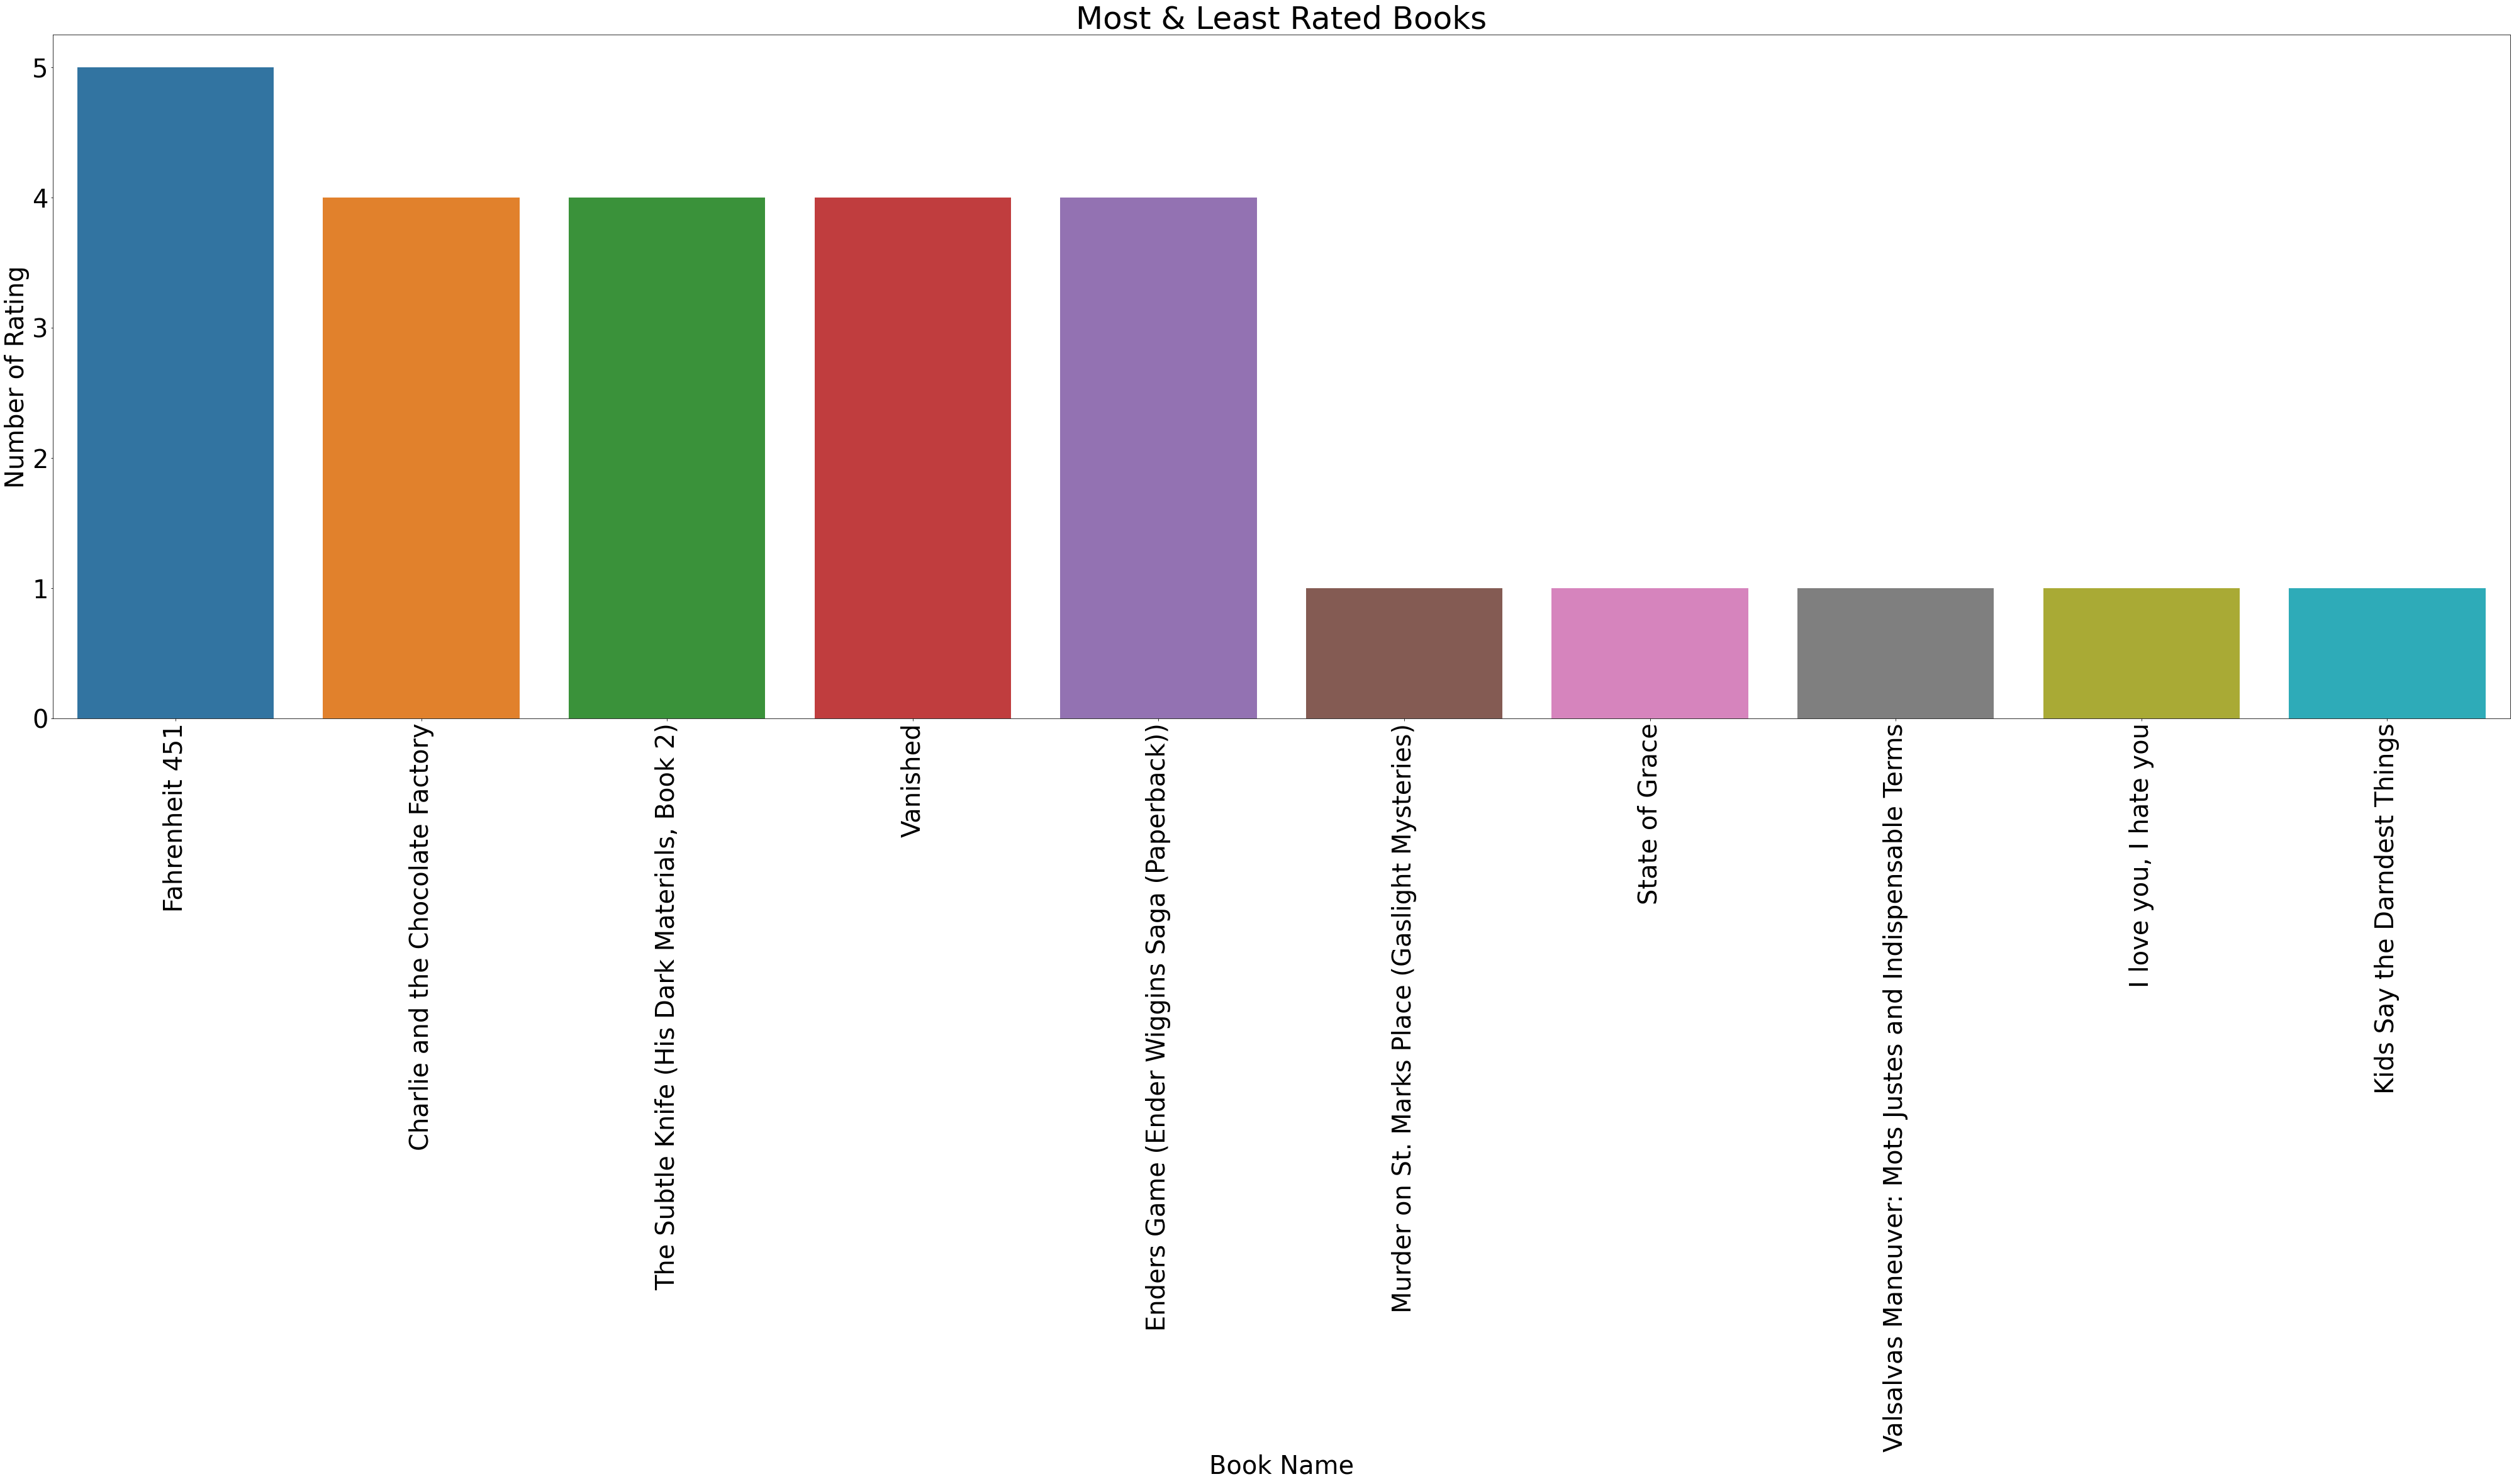

In [ ]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x = mnl_rated['Books'], y = mnl_rated['Number_of_Rating'])
plt.xlabel('Book Name', size=40)
plt.ylabel('Number of Rating', size=40)
plt.title('Most & Least Rated Books', size=50)
plt.show()

In [ ]:
#most rating given
highest_rated = pd.DataFrame(book_df.groupby('Book')['Rating'].count())
highest_rated.head()

,Rating
Book,
"Jason, Madison &amp",1
Other Stories;Merril;1985;McClelland &amp,1
Repairing PC Drives &amp,1
'48,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,1


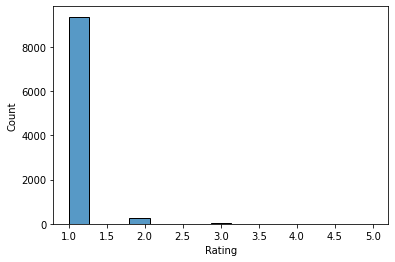

In [ ]:
sns.histplot(highest_rated['Rating'])

So, most books have been rated only once.

In [ ]:
#Popularity Recommeder System
#number of rating given to each book
num_rating = book_df.groupby('Book').count()['Rating'].reset_index()
num_rating.rename(columns={'Rating':'num_ratings'}, inplace=True)
num_rating

,Book,num_ratings
0,"Jason, Madison &amp",1
1,Other Stories;Merril;1985;McClelland &amp,1
2,Repairing PC Drives &amp,1
3,'48,1
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1
...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",1
9655,"\Well, there's your problem\: Cartoons",1
9656,iI Paradiso Degli Orchi,1
9657,stardust,1


In [ ]:
#average rating given to a book
avg_rating = book_df.groupby('Book').mean()['Rating'].reset_index()
avg_rating.rename(columns={'Rating':'avg_ratings'}, inplace=True)
avg_rating

,Book,avg_ratings
0,"Jason, Madison &amp",8.0
1,Other Stories;Merril;1985;McClelland &amp,6.0
2,Repairing PC Drives &amp,4.0
3,'48,7.0
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,8.0
...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",8.0
9655,"\Well, there's your problem\: Cartoons",9.0
9656,iI Paradiso Degli Orchi,7.0
9657,stardust,5.0


In [ ]:
popular_df = num_rating.merge(avg_rating, on = 'Book')
popular_df

,Book,num_ratings,avg_ratings
0,"Jason, Madison &amp",1,8.0
1,Other Stories;Merril;1985;McClelland &amp,1,6.0
2,Repairing PC Drives &amp,1,4.0
3,'48,1,7.0
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1,8.0
...,...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",1,8.0
9655,"\Well, there's your problem\: Cartoons",1,9.0
9656,iI Paradiso Degli Orchi,1,7.0
9657,stardust,1,5.0


In [ ]:
#Popular books according to our criteria
popular_df = popular_df[popular_df['num_ratings'] >= 3]
popular_df.sort_values('avg_ratings', ascending = False)

,Book,num_ratings,avg_ratings
7398,The Face,3,9.000000
8459,"The Subtle Knife (His Dark Materials, Book 2)",4,8.750000
6471,Stardust,4,8.500000
8505,The Testament,3,8.333333
3237,High Fidelity,3,8.333333
7997,The Neverending Story,3,8.333333
7635,The Hitchhiker's Guide to the Galaxy,3,8.333333
7540,"The Golden Compass (His Dark Materials, Book 1)",3,8.333333
6843,"The Amber Spyglass (His Dark Materials, Book 3)",4,8.250000
6637,Suzanne's Diary for Nicholas,3,8.000000


In [ ]:
popular_df = popular_df.sort_values('avg_ratings', ascending = False).head(10)
popular_df

,Book,num_ratings,avg_ratings
7398,The Face,3,9.000000
8459,"The Subtle Knife (His Dark Materials, Book 2)",4,8.750000
6471,Stardust,4,8.500000
8505,The Testament,3,8.333333
3237,High Fidelity,3,8.333333
7997,The Neverending Story,3,8.333333
7635,The Hitchhiker's Guide to the Galaxy,3,8.333333
7540,"The Golden Compass (His Dark Materials, Book 1)",3,8.333333
6843,"The Amber Spyglass (His Dark Materials, Book 3)",4,8.250000
6637,Suzanne's Diary for Nicholas,3,8.000000


According to popularity, we can recommed the above 28 books with highest ot lowest ratings.

In [ ]:
book_df.UserID.unique().shape

(2182,)

In [ ]:
book_df.Book.unique().shape

(9659,)

In [ ]:
book_df.shape

(10000, 3)

In [ ]:
#Users who have rated books more than or equal to 2 times.
x = book_df.groupby('UserID').count()['Rating'] >= 2
active_users = x[x].index
active_users

Int64Index([     8,     14,     17,     26,     39,     53,     56,     69,
                87,     92,
            ...
            278732, 278773, 278782, 278798, 278818, 278832, 278843, 278844,
            278851, 278854],
           dtype='int64', name='UserID', length=859)

In [ ]:
active_users_df = book_df[book_df['UserID'].isin(active_users)]

In [ ]:
#Books which have rated more than or equal to 2 times.
y = active_users_df.groupby('Book').count()['Rating'] >= 2
famous_book = y[y].index
famous_book

Index(['1st to Die: A Novel', '2nd Chance', 'A Density of Souls',
       'A Light in the Attic', 'A Little Princess', 'A Map of the World',
       'A Reporter's Life', 'A Time to Kill', 'A Woman's Worth',
       'Acceptable Risk',
       ...
       'White Oleander : A Novel', 'Wild Seed', 'Wildest Hearts',
       'Winter's Tale', 'Wish You Well', 'Witch', 'Women on the Case',
       'Wouldn't Take Nothing for My Journey Now', 'Wuthering Heights',
       'Young Wives'],
      dtype='object', name='Book', length=243)

In [ ]:
famous_book_df = active_users_df[active_users_df['Book'].isin(famous_book)]
famous_book_df.shape

(511, 3)

In [ ]:
#drop duplicates
final_df = famous_book_df.drop_duplicates()
final_df.shape

(509, 3)

In [ ]:
#create a pivot table for famous_book_df
user_df = final_df.pivot_table(index = 'Book', columns = 'UserID', values = 'Rating')
user_df.fillna(0, inplace=True)

In [ ]:
user_df

UserID,53,160,183,242,254,392,444,446,486,503,...,278582,278633,278637,278648,278668,278675,278694,278843,278844,278851
Book,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Density of Souls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Light in the Attic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Little Princess,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Witch,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Women on the Case,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wouldn't Take Nothing for My Journey Now,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculating cosine similarity distances between users
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(user_df)
similarity_scores

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#create a function to recommend similar books
def recommend(book_name):
    index = np.where(user_df.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse = True)[1:6]

    for i in similar_items:
      print(user_df.index[i[0]])

In [ ]:
#Recommendations Results
recommend('Young Wives')

Icebound
1st to Die: A Novel
2nd Chance
A Density of Souls
A Light in the Attic


In [ ]:
recommend("Wouldn't Take Nothing for My Journey Now")

A Time to Kill
Life Before Man
The Hobbit: Or There and Back Again
The Adventures of Tom Sawyer
How Stella Got Her Groove Back


In [ ]:
recommend('A Little Princess')

The Magician's Tale
Juniper
How to Make an American Quilt
The Smoke Jumper
Alice's Tulips


In [ ]:
#create a pivot table for famous_book_df
recommend_df = book_df.pivot_table(index = 'Book', columns = 'UserID', values = 'Rating')
recommend_df.fillna(0, inplace=True)
recommend_df

UserID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [ ]:
final_similarity_score = cosine_similarity(recommend_df)
final_similarity_score

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#create a function to recommend similar books
def recommend(book_name):
    index = np.where(recommend_df.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(final_similarity_score[index])), key=lambda x:x[1], reverse = True)[1:6]

    for i in similar_items:
      print(recommend_df.index[i[0]])

In [ ]:
#Recommendation Results for Original data
recommend("stardust")

Fires of Aggar
Kamikaze Lust
Rule of the Bone : Novel, A
Stone Butch Blues
The Adventures of Dougal


In [ ]:
recommend("'48")

Angry Men, Passive Men: Understanding the Roots of Men's Anger and How to Move Beyond It
Her Father's House
The Day
The Homeschooling Book of Answers : The 88 Most Important Questions Answered by Homeschooling's Most Respected Voices
The Scold's Bridle


In [ ]:
recommend("iI Paradiso Degli Orchi")

Fantastic Imagination
Hitched
Huis Clos Suivi de Les Mouches (Folio Ser. No. 807)
McNally's Chance
Mystic River
